In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [54]:
data = pd.read_csv('./normalized_data/consolidated.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   position         1328 non-null   int64  
 1   team             1328 non-null   object 
 2   points           1328 non-null   float64
 3   won              1328 non-null   float64
 4   lost             1328 non-null   float64
 5   draw             1328 non-null   float64
 6   played           1328 non-null   float64
 7   goals_for        1328 non-null   float64
 8   goals_against    1328 non-null   float64
 9   goal_difference  1328 non-null   float64
 10  year             1328 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 114.2+ KB
None


C:\Users\Sneha\AppData\Local\Temp\ipykernel_31644\2431654695.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


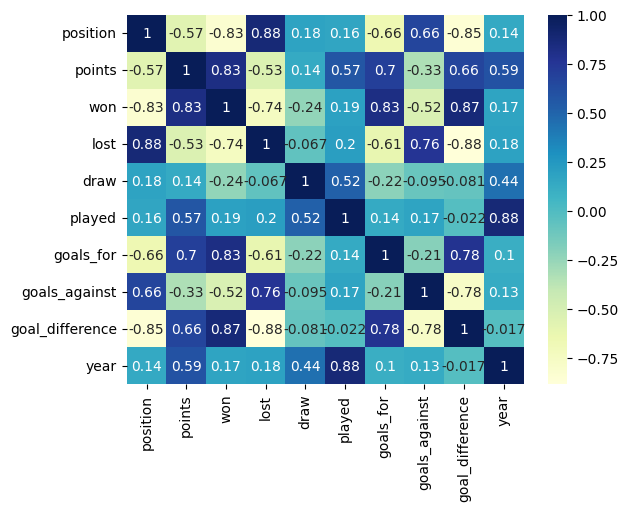

In [55]:
# Check for missing values and data types
print(data.info())

# Check for correlations between variables
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [56]:
# Feature engineering
data['Win Percentage'] = data['won'] / data['played']
data['Goals Per Game'] = data['goals_for'] / data['played']
data['Goals Against Per Game'] = data['goals_against'] / data['played']
data['Goal Difference Per Game'] = data['goal_difference'] / data['played']

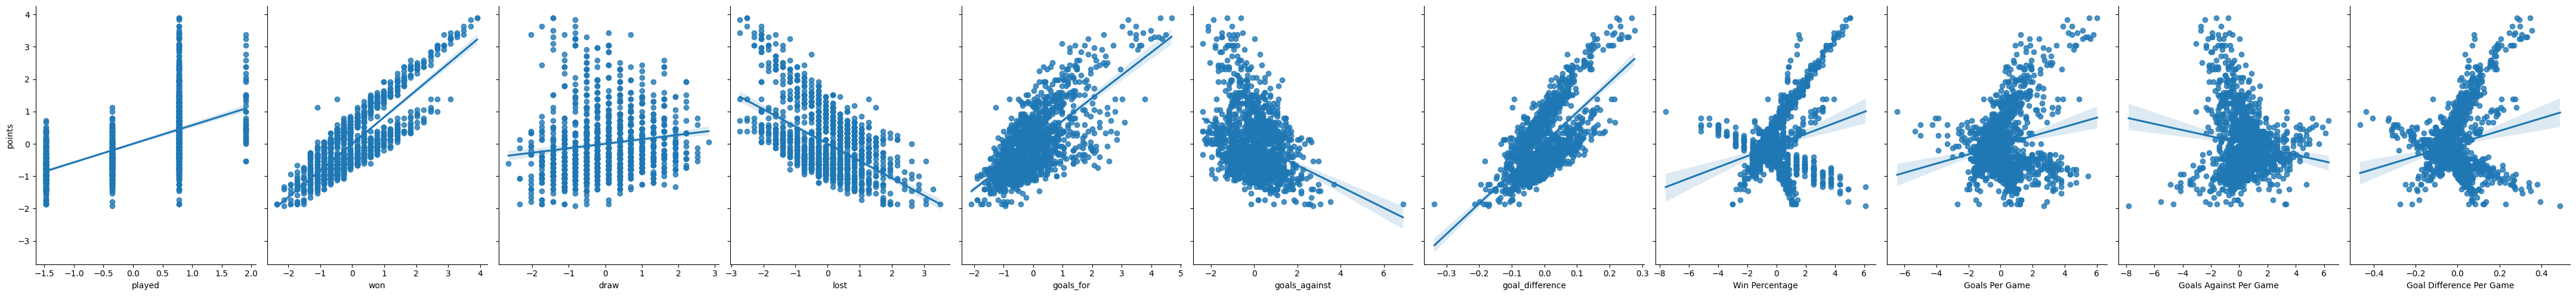

In [57]:
import seaborn as sns

# create a pair plot
sns.pairplot(data, x_vars=['played', 'won', 'draw', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'Win Percentage', 'Goals Per Game', 'Goals Against Per Game', 'Goal Difference Per Game'],
             y_vars=['points'], height=5, aspect=.8, kind='reg')

# display the plot
plt.show()


In [ ]:
train_data = data[data['year'] < 2021]
test_data = data[data['year'] == 2021]

# Define the features and target variable
features = ['played', 'won', 'draw', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'Win Percentage', 'Goals Per Game', 'Goals Against Per Game', 'Goal Difference Per Game']
target = 'points'

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(train_data[features], train_data[target])


RandomForestRegressor(max_depth=5, random_state=42)

In [ ]:
y_pred = rf_model.predict(test_data[features])
mse = mean_squared_error(test_data[target], y_pred)
r2_error=r2_score(test_data[target],y_pred)
print("Mean Squared Error: ", mse)
print("R-squared Score: ", r2_error)

Mean Squared Error:  0.08282141724143352
R-squared Score:  0.9144172846113237


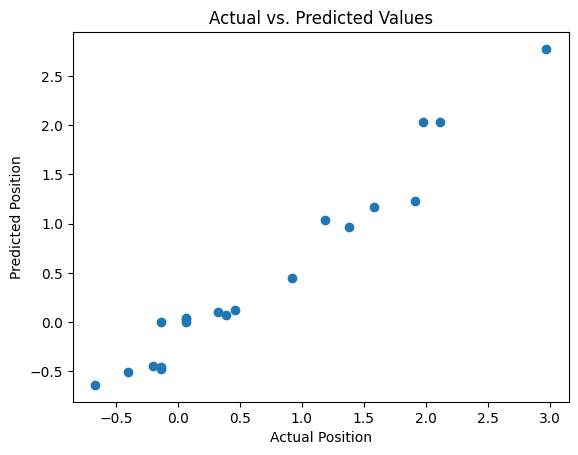

In [ ]:
plt.scatter(test_data[target], y_pred)
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.title("Actual vs. Predicted Values")
plt.show()

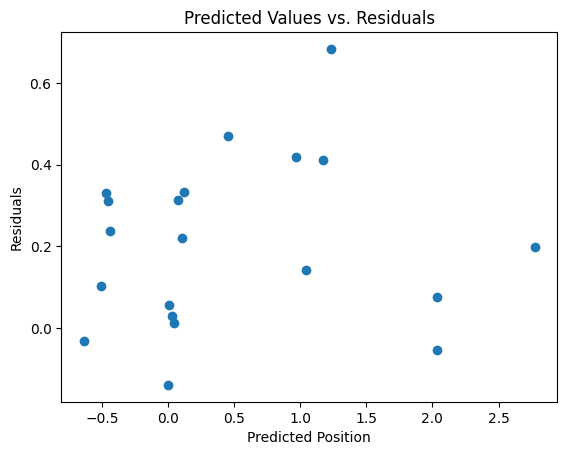

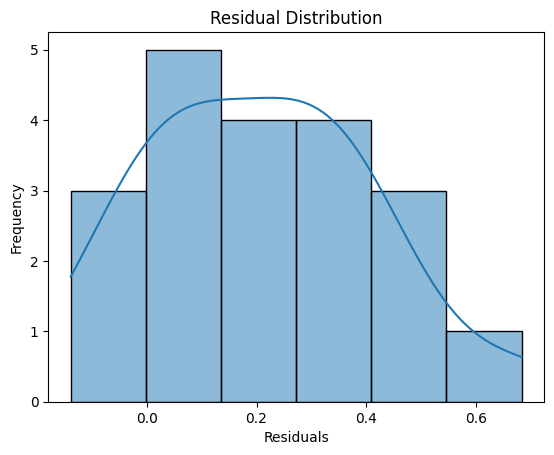

In [ ]:
# Create a scatter plot of predicted values vs. residuals
plt.scatter(y_pred, test_data[target] - y_pred)
plt.xlabel("Predicted Position")
plt.ylabel("Residuals")
plt.title("Predicted Values vs. Residuals")
plt.show()

# Create a histogram of residuals
sns.histplot(test_data[target] - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

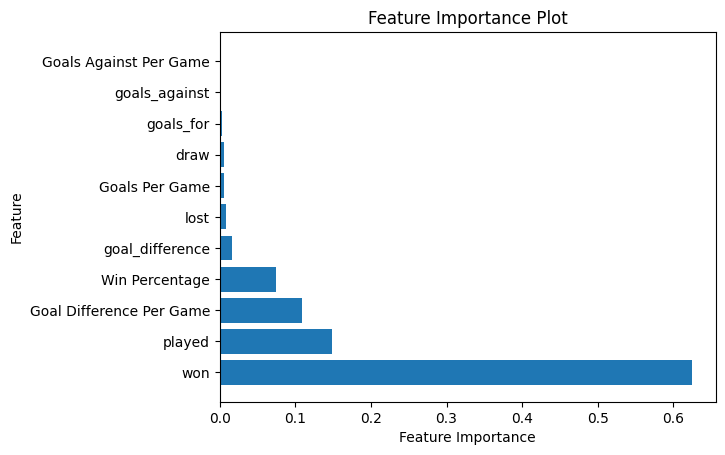

In [ ]:
# Create a bar plot of feature importance
coef_df = pd.DataFrame({'feature': test_data[features].columns, 'importance': rf_model.feature_importances_})
coef_df = coef_df.sort_values(by='importance', ascending=False)

plt.barh(coef_df['feature'], coef_df['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

mae = mean_absolute_error(test_data[target], y_pred)


accuracy = (1 - (mae / test_data[target].mean())) * 100


print("Percentage Accuracy:", accuracy)


Percentage Accuracy: 66.63493178876264
